In [13]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [78]:
def make_simple_plot():
    fig, axes=plt.subplots(figsize=(12,5), nrows=1, ncols=2);
    axes[0].set_ylabel("$y$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([-2,2])
    axes[1].set_ylim([-2,2])
    plt.tight_layout();
    return axes
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,7])
    axes[1].set_ylim([0,7])
    axes[0].set_xlim([0,110])
    axes[1].set_xlim([0,110])
    plt.tight_layout();
    return axes

In [79]:
#load the data for analysis
dflog=pd.read_excel("data/DataSet_GasPrice_ Outlier_Removed.xlsx")
dflog.head()

,Days,Date,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice,Weather,WSTAT,GasPriceStatus
0,245,2008-12-31,57.22,41.12,2227.028,2399.702,5.82,WINTER,1,HIGH
1,276,2009-01-31,54.37,41.71,2251.938,2729.715,5.24,WINTER,1,HIGH
2,304,2009-02-28,52.30,39.09,2074.167,2332.539,4.52,WINTER,1,HIGH
3,335,2009-03-31,44.34,47.94,2262.488,2170.709,3.96,WINTER,1,HIGH
4,365,2009-04-30,41.92,49.65,2147.856,1741.293,3.50,SPRING,0,HIGH


In [80]:
# focus on the relationship between Total Gas Consumption and gas price
dfpetr = dflog[['OilPrice', 'GasPrice']]
dfpetr.head()

,OilPrice,GasPrice
0,41.12,5.82
1,41.71,5.24
2,39.09,4.52
3,47.94,3.96
4,49.65,3.50


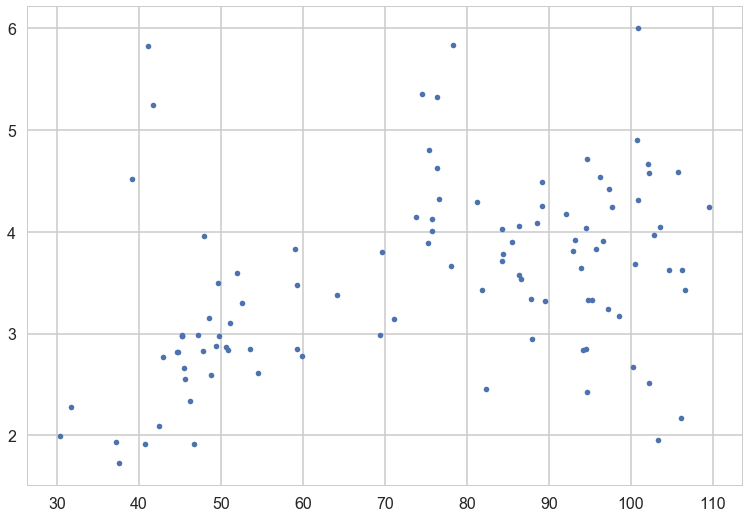

In [81]:
x=dfpetr.OilPrice.values
f=dfpetr.GasPrice.values
plt.plot(x,f,'.')

In [82]:
#allindexes=np.sort(np.random.choice(x.shape[0], size=100, replace=False))
indexes=np.sort(np.random.choice(x.shape[0], size=30, replace=False))

In [83]:
samplex = x[indexes]
samplef = f[indexes]

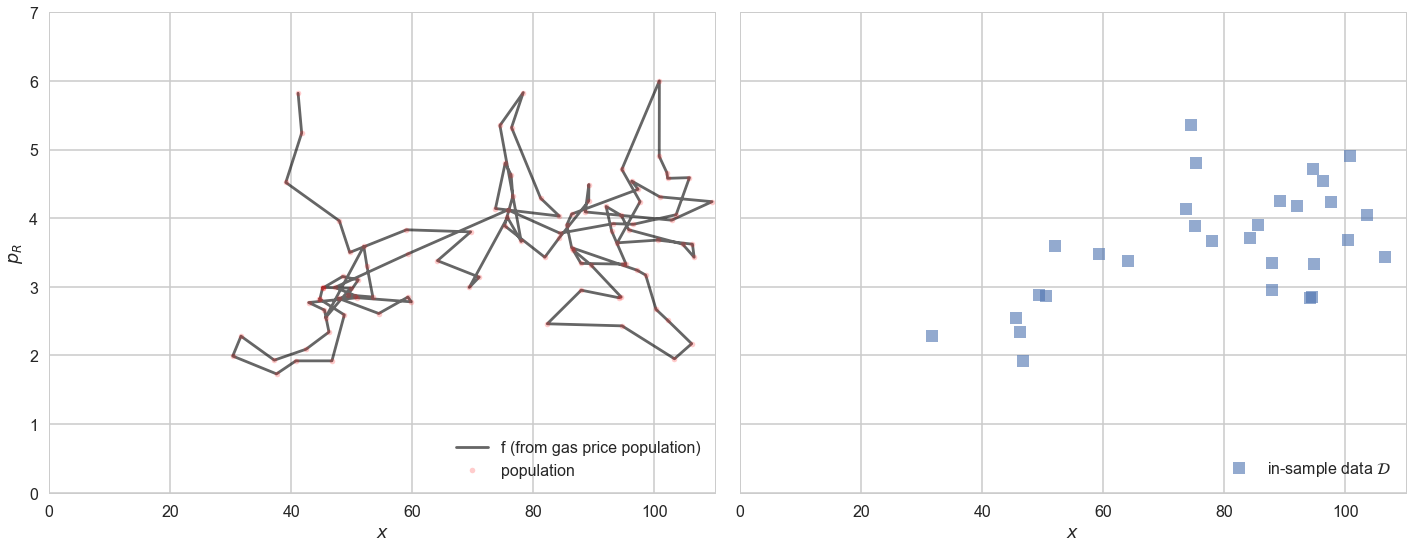

In [84]:
axes=make_plot()
axes[0].plot(x,f, 'k-', alpha=0.6, label="f (from gas price population)");
axes[0].plot(x,f, 'r.', alpha=0.2, label="population");
axes[1].plot(samplex,samplef, 's', alpha=0.6, label="in-sample data $\cal{D}$");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

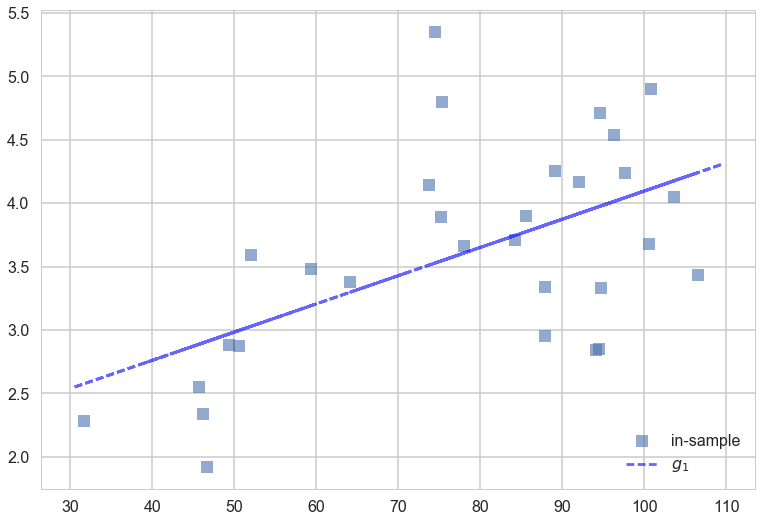

In [85]:
g1 = np.poly1d(np.polyfit(x[indexes],f[indexes],1))
plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g1(x), 'b--', alpha=0.6, label="$g_1$");
plt.legend(loc=4);

In [86]:
g5 = np.poly1d(np.polyfit(x[indexes],f[indexes],5))

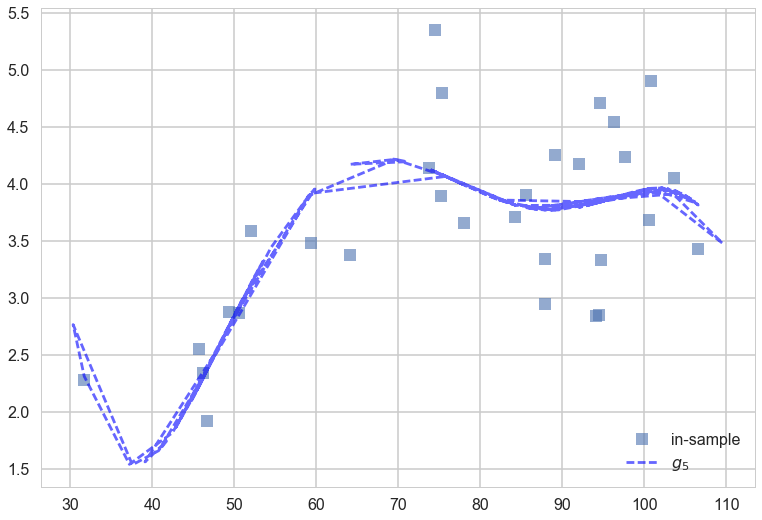

In [87]:
plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g5(x), 'b--', alpha=0.6, label="$g_{5}$");
plt.legend(loc=4);

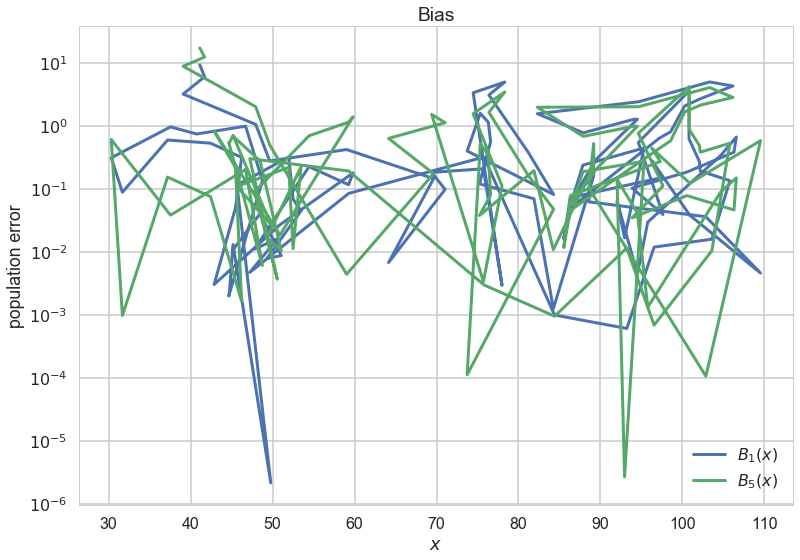

In [88]:
plt.plot(x, (g1(x)-f)**2, lw=3, label="$B_1(x)$")
plt.plot(x, (g5(x)-f)**2, lw=3,label="$B_{5}(x)$");
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Bias");

C:\Users\Angus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


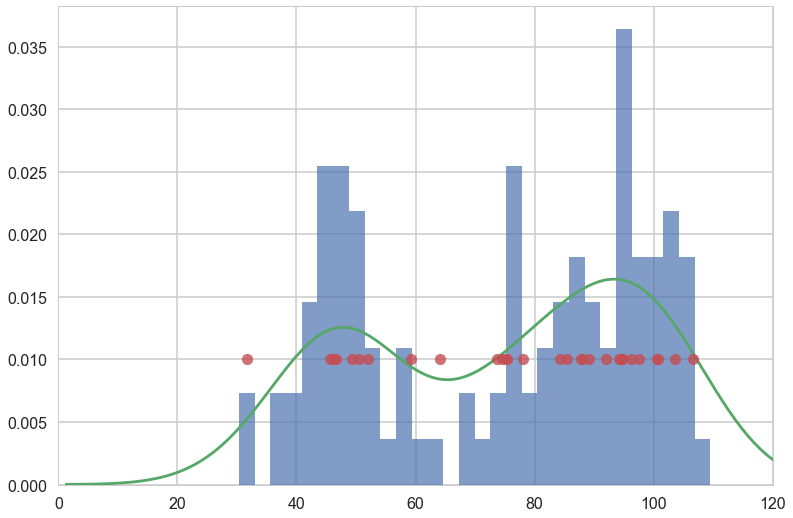

In [98]:
plt.hist(x, normed=True, bins=30, alpha=0.7)
sns.kdeplot(x)
plt.plot(x[indexes], [0.01]*len(indexes),'o', alpha=0.8)
plt.xlim([0,120]);

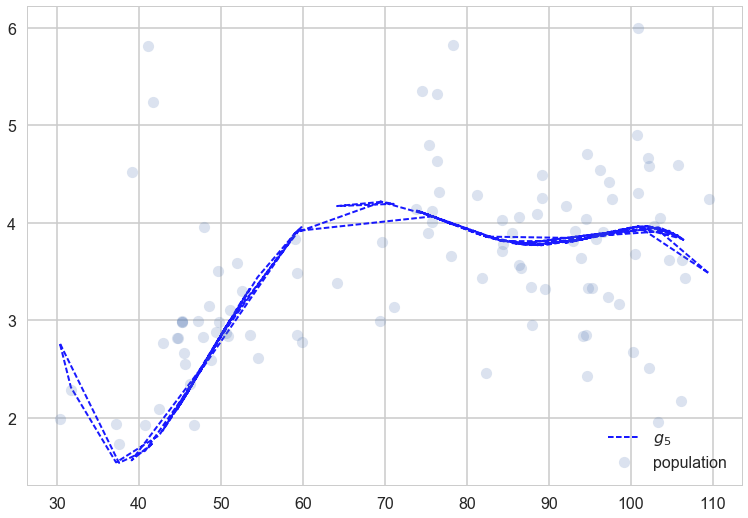

In [103]:
#plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g5(x), 'b--', alpha=0.9, lw=2, label="$g_{5}$");
plt.plot(x,f, 'o', alpha=0.2, label="population");
plt.legend(loc=4);

In [104]:
sigma=0.06
mask=(x > 0.65) & (x < 0.8)
sigmalist=sigma+mask*0.03

In [109]:
f.shape

(104,)

In [153]:
y = f + sp.stats.norm.rvs(scale=sigmalist, size=104)
#the next three lines just ensure that y remains a probability
#yadd = (y < 3.0) *(0.01-y)
#ysub = (y > 3.0)*(y - 1.0)
#y = y + yadd -ysub
y

array([ 5.80404793,  5.24557212,  4.53310876,  3.89624938,  3.52264406,
        3.8726981 ,  3.83977583,  3.36302754,  3.17026173,  3.04075353,
        4.04815678,  3.69429719,  5.27930871,  5.8783185 ,  5.27585914,
        4.30420146,  3.92092038,  4.2256845 ,  4.83384873,  4.65048989,
        4.33885536,  3.84510216,  3.4503663 ,  3.78158688,  4.25562454,
        4.47804778,  4.01168834,  4.02865256,  4.22547177,  4.43182123,
        4.59098146,  4.35431704,  4.05523813,  3.86243333,  3.66134425,
        3.155947  ,  3.11221181,  2.59362387,  2.47891497,  2.22442725,
        1.95231142,  2.51654937,  2.54153469,  3.05252236,  2.91352897,
        2.83314534,  3.43016563,  3.57250468,  3.26809032,  3.20132428,
        3.26451209,  3.88650886,  4.13442273,  4.00515515,  3.83539141,
        3.61372489,  3.54103735,  3.64911728,  3.71232398,  3.57177549,
        4.10702597,  4.70705982,  5.98303915,  4.9494262 ,  4.73389254,
        4.70908255,  4.62739306,  4.05735328,  3.94417539,  3.93

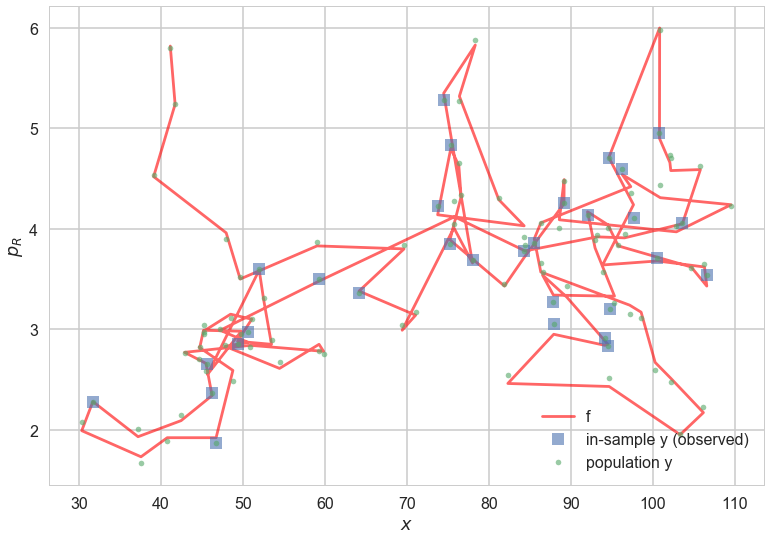

In [154]:
plt.plot(x,f, 'r-', alpha=0.6, label="f");
plt.plot(x[indexes], y[indexes], 's', alpha=0.6, label="in-sample y (observed)");
plt.plot(x, y, '.', alpha=0.6, label="population y");
plt.xlabel('$x$');
plt.ylabel('$p_R$')
plt.legend(loc=4);

In [155]:
g1noisy = np.poly1d(np.polyfit(x[indexes],y[indexes],1))
g5noisy = np.poly1d(np.polyfit(x[indexes],y[indexes],5))

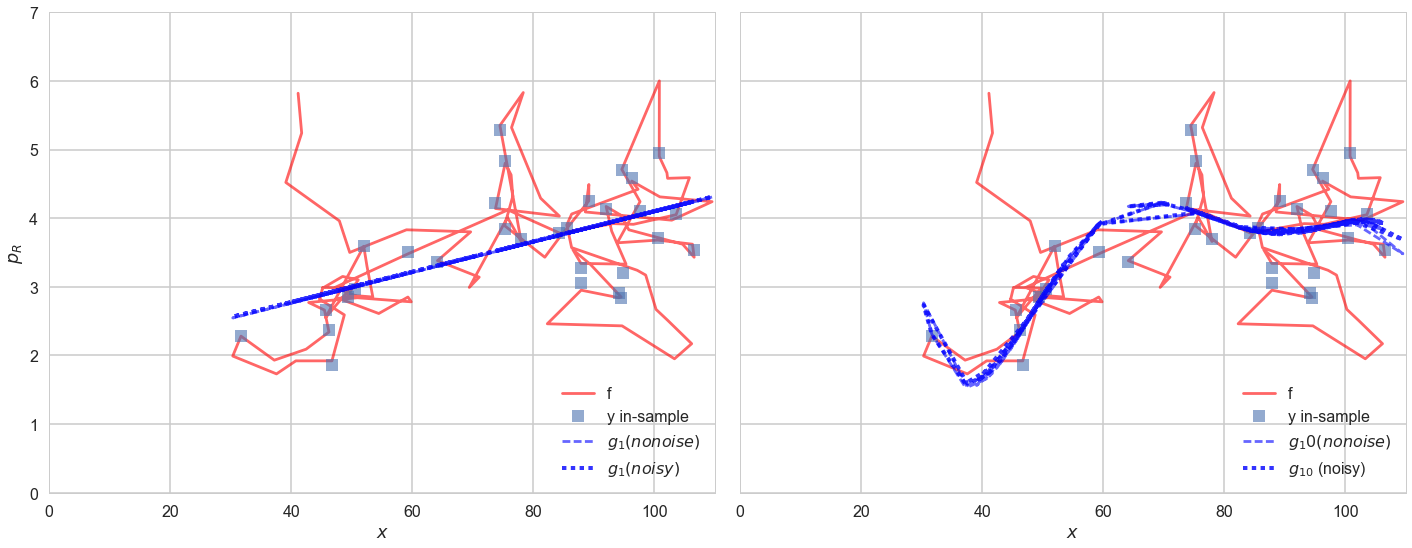

In [156]:
axes=make_plot()
axes[0].plot(x,f, 'r-', alpha=0.6, label="f");
axes[1].plot(x,f, 'r-', alpha=0.6, label="f");
axes[0].plot(x[indexes],y[indexes], 's', alpha=0.6, label="y in-sample");
axes[1].plot(x[indexes],y[indexes], 's', alpha=0.6, label="y in-sample");
axes[0].plot(x,g1(x),  'b--', alpha=0.6, label="$g_1 (no noise)$");
axes[0].plot(x,g1noisy(x), 'b:', lw=4, alpha=0.8, label="$g_1 (noisy)$");
axes[1].plot(x,g5(x),  'b--', alpha=0.6, label="$g_10 (no noise)$");
axes[1].plot(x,g5noisy(x), 'b:', lw=4, alpha=0.8, label="$g_{10}$ (noisy)");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

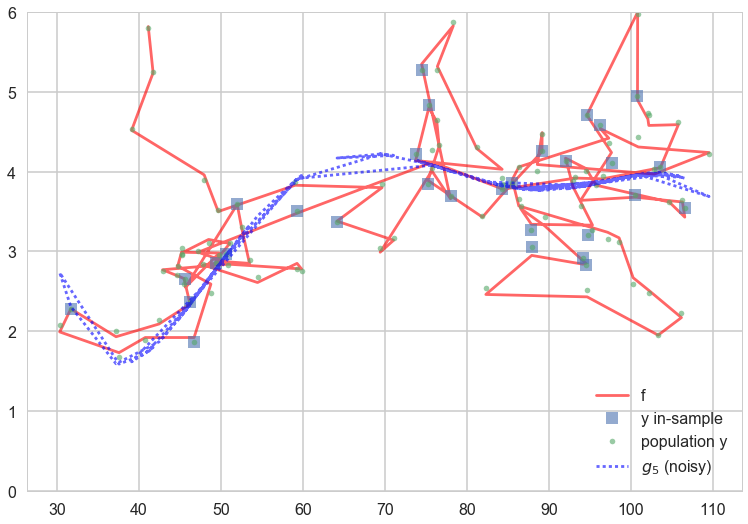

In [157]:
plt.plot(x,f, 'r-', alpha=0.6, label="f");
plt.plot(x[indexes],y[indexes], 's', alpha=0.6, label="y in-sample");
plt.plot(x,y,  '.', alpha=0.6, label="population y");
plt.plot(x,g5noisy(x), 'b:', alpha=0.6, label="$g_{5}$ (noisy)");
plt.ylim([0,6])
plt.legend(loc=4);

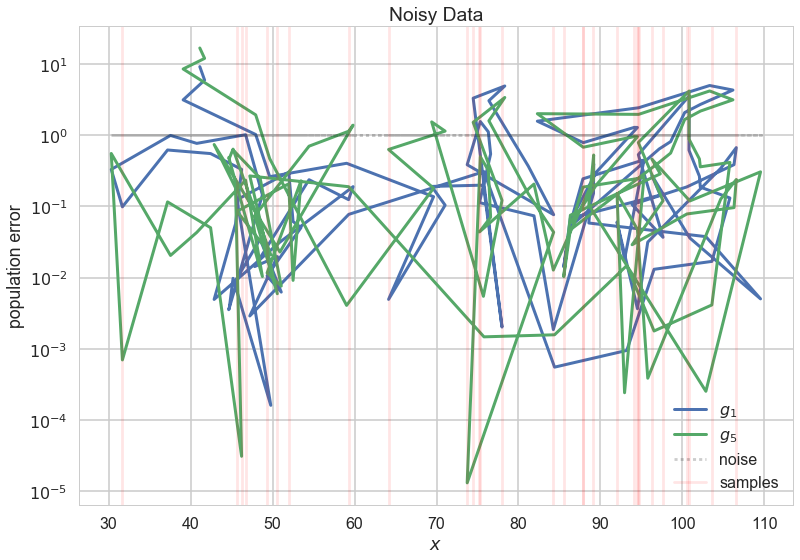

In [158]:
plt.plot(x, ((g1noisy(x)-f)**2), lw=3, label="$g_1$")
plt.plot(x, ((g5noisy(x)-f)**2), lw=3,label="$g_{5}$");
plt.plot(x, [1]*x.shape[0], "k:", label="noise", alpha=0.2);
for i in indexes[:-1]:
    plt.axvline(x[i], 0, 1, color='r', alpha=0.1)
plt.axvline(x[indexes[-1]], 0, 1, color='r', alpha=0.1, label="samples")
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Noisy Data");

In [159]:
def gen(degree, nsims, size, x, out):
    outpoly=[]
    for i in range(nsims):
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))
        pc=np.polyfit(x[indexes], out[indexes], degree)
        p=np.poly1d(pc)
        outpoly.append(p)
    return outpoly

In [160]:
polys1 = gen(1, 104, 30,x, y);
polys5 = gen(5, 104, 30,x, y);

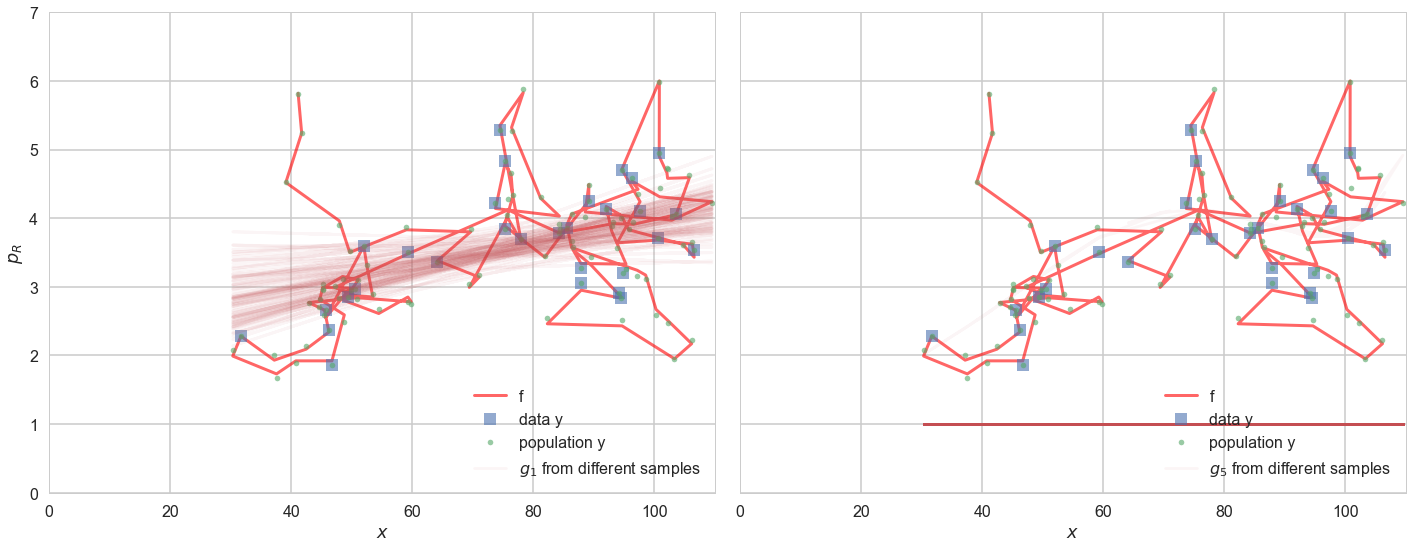

In [161]:
axes=make_plot()
axes[0].plot(x,f, 'r-', lw=3, alpha=0.6, label="f");
axes[1].plot(x,f, 'r-', lw=3, alpha=0.6, label="f");
axes[0].plot(x[indexes], y[indexes], 's', alpha=0.6, label="data y");
axes[1].plot(x[indexes], y[indexes], 's', alpha=0.6, label="data y");
axes[0].plot(x, y, '.', alpha=0.6, label="population y");
axes[1].plot(x, y, '.', alpha=0.6, label="population y");
c=sns.color_palette()[2]
for i,p in enumerate(polys1[:-1]):
    axes[0].plot(x,p(x), alpha=0.05, c=c)
axes[0].plot(x,polys1[-1](x), alpha=0.05, c=c,label="$g_1$ from different samples")
for i,p in enumerate(polys20[:-1]):
    axes[1].plot(x,p(x), alpha=0.05, c=c)
axes[1].plot(x,polys5[-1](x), alpha=0.05, c=c, label="$g_{5}$ from different samples")
axes[0].legend(loc=4);
axes[1].legend(loc=4);

C:\Users\Angus\Anaconda3\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


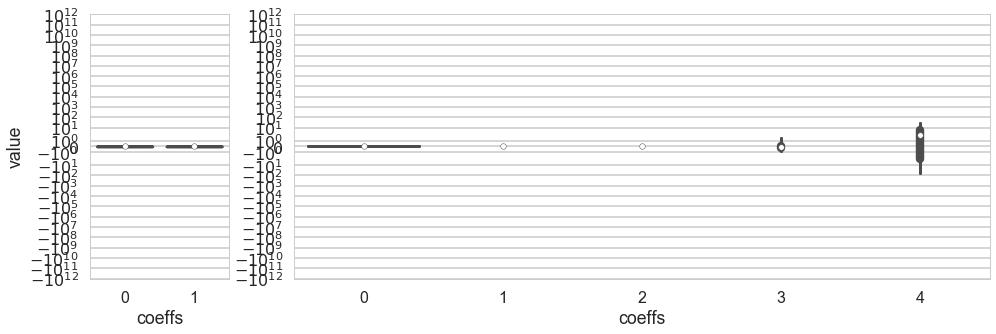

In [163]:
pdict1={}
pdict5={}
for i in reversed(range(2)):
    pdict1[i]=[]
    for j, p in enumerate(polys1):
        pdict1[i].append(p.c[0])
for i in reversed(range(5)):
    pdict5[i]=[]
    for j, p in enumerate(polys5):
        pdict5[i].append(p.c[i]) 
df1=pd.DataFrame(pdict1)
df5=pd.DataFrame(pdict5)
fig = plt.figure(figsize=(14, 5)) 
from matplotlib import gridspec
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 
axes = [plt.subplot(gs[0]), plt.subplot(gs[1])]
axes[0].set_ylabel("value")
axes[0].set_xlabel("coeffs")
axes[1].set_xlabel("coeffs")
plt.tight_layout();
sns.violinplot(df1, ax=axes[0]);
sns.violinplot(df5, ax=axes[1]);
axes[0].set_yscale("symlog");
axes[1].set_yscale("symlog");
axes[0].set_ylim([-1e12, 1e12]);
axes[1].set_ylim([-1e12, 1e12]);

In [164]:
df=pd.DataFrame(dict(x=x[indexes],f=f[indexes],y=y[indexes]))

In [165]:
from sklearn.cross_validation import train_test_split
datasize=df.shape[0]
#split dataset using the index, as we have x,f, and y that we want to split.
itrain,itest = train_test_split(range(30),train_size=24, test_size=6)
xtrain= df.x[itrain].values
ftrain = df.f[itrain].values
ytrain = df.y[itrain].values
xtest= df.x[itest].values
ftest = df.f[itest].values
ytest = df.y[itest].values

In [166]:
ytest

array([ 4.9494262 ,  4.25562454,  2.65610159,  3.86243333,  2.36266165,
        3.36302754])

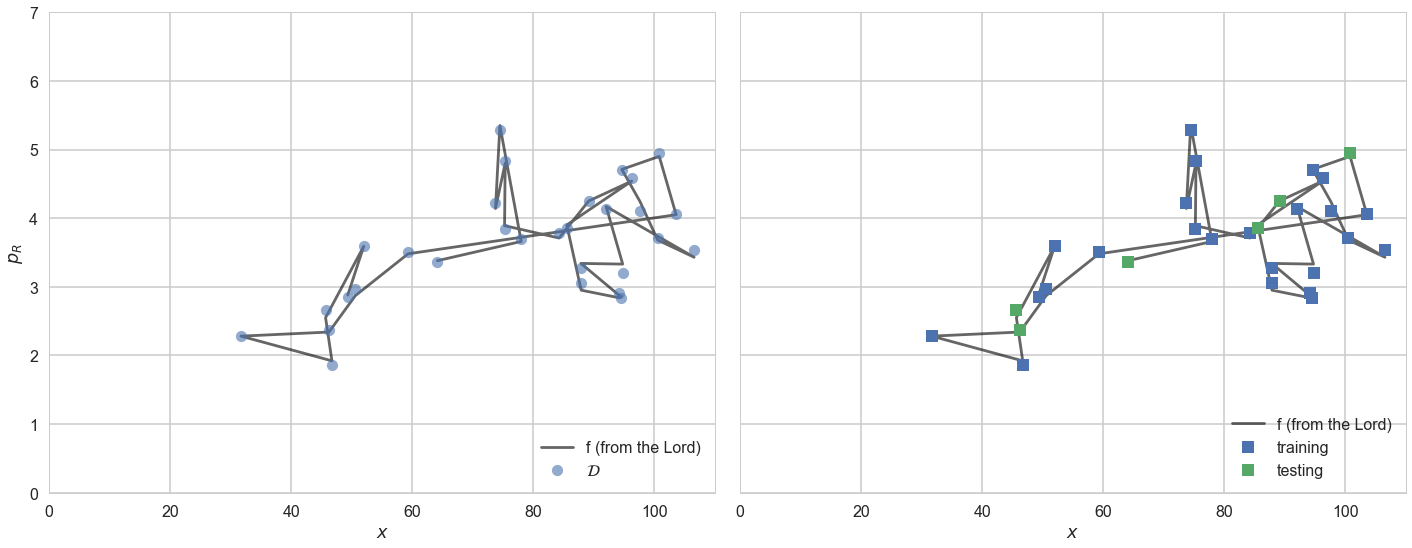

In [167]:
axes=make_plot()
axes[0].plot(df.x,df.f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[0].plot(df.x,df.y, 'o',alpha=0.6, label="$\cal{D}$");
axes[1].plot(df.x,df.f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[1].plot(xtrain, ytrain, 's', label="training")
axes[1].plot(xtest, ytest, 's', label="testing")
axes[0].legend(loc="lower right")
axes[1].legend(loc="lower right")

In [168]:
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures(3).fit_transform([[1],[2], [3]])

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.]])

In [169]:
np.array([1,2,3]).reshape(-1,1)

array([[1],
       [2],
       [3]])

In [170]:
xtrain

array([  75.24,  103.59,   59.29,   87.86,   73.74,   74.47,   94.62,
         50.58,   75.34,   31.68,   92.02,   51.97,   49.33,   87.9 ,
         94.76,   94.13,   46.71,  100.54,   77.99,   84.25,   94.51,
         97.63,   96.26,  106.57])

In [171]:
xtrain.reshape(-1,1)

array([[  75.24],
       [ 103.59],
       [  59.29],
       [  87.86],
       [  73.74],
       [  74.47],
       [  94.62],
       [  50.58],
       [  75.34],
       [  31.68],
       [  92.02],
       [  51.97],
       [  49.33],
       [  87.9 ],
       [  94.76],
       [  94.13],
       [  46.71],
       [ 100.54],
       [  77.99],
       [  84.25],
       [  94.51],
       [  97.63],
       [  96.26],
       [ 106.57]])

In [172]:
PolynomialFeatures(2).fit_transform(xtrain.reshape(-1,1))

array([[  1.00000000e+00,   7.52400000e+01,   5.66105760e+03],
       [  1.00000000e+00,   1.03590000e+02,   1.07308881e+04],
       [  1.00000000e+00,   5.92900000e+01,   3.51530410e+03],
       [  1.00000000e+00,   8.78600000e+01,   7.71937960e+03],
       [  1.00000000e+00,   7.37400000e+01,   5.43758760e+03],
       [  1.00000000e+00,   7.44700000e+01,   5.54578090e+03],
       [  1.00000000e+00,   9.46200000e+01,   8.95294440e+03],
       [  1.00000000e+00,   5.05800000e+01,   2.55833640e+03],
       [  1.00000000e+00,   7.53400000e+01,   5.67611560e+03],
       [  1.00000000e+00,   3.16800000e+01,   1.00362240e+03],
       [  1.00000000e+00,   9.20200000e+01,   8.46768040e+03],
       [  1.00000000e+00,   5.19700000e+01,   2.70088090e+03],
       [  1.00000000e+00,   4.93300000e+01,   2.43344890e+03],
       [  1.00000000e+00,   8.79000000e+01,   7.72641000e+03],
       [  1.00000000e+00,   9.47600000e+01,   8.97945760e+03],
       [  1.00000000e+00,   9.41300000e+01,   8.8604569

In [173]:
def make_features(train_set, test_set, degrees):
    traintestlist=[]
    for d in degrees:
        traintestdict={}
        traintestdict['train'] = PolynomialFeatures(d).fit_transform(train_set.reshape(-1,1))
        traintestdict['test'] = PolynomialFeatures(d).fit_transform(test_set.reshape(-1,1))
        traintestlist.append(traintestdict)
    return traintestlist

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

degrees=range(21)
error_train=np.empty(len(degrees))
error_test=np.empty(len(degrees))

traintestlists=make_features(xtrain, xtest, degrees)

In [175]:
traintestlists[3]['train'], ytrain

(array([[  1.00000000e+00,   7.52400000e+01,   5.66105760e+03,
           4.25937974e+05],
        [  1.00000000e+00,   1.03590000e+02,   1.07308881e+04,
           1.11161270e+06],
        [  1.00000000e+00,   5.92900000e+01,   3.51530410e+03,
           2.08422380e+05],
        [  1.00000000e+00,   8.78600000e+01,   7.71937960e+03,
           6.78224692e+05],
        [  1.00000000e+00,   7.37400000e+01,   5.43758760e+03,
           4.00967710e+05],
        [  1.00000000e+00,   7.44700000e+01,   5.54578090e+03,
           4.12994304e+05],
        [  1.00000000e+00,   9.46200000e+01,   8.95294440e+03,
           8.47127599e+05],
        [  1.00000000e+00,   5.05800000e+01,   2.55833640e+03,
           1.29400655e+05],
        [  1.00000000e+00,   7.53400000e+01,   5.67611560e+03,
           4.27638549e+05],
        [  1.00000000e+00,   3.16800000e+01,   1.00362240e+03,
           3.17947576e+04],
        [  1.00000000e+00,   9.20200000e+01,   8.46768040e+03,
           7.79195950e+05],

In [176]:
traintestlists[3]['test'], ytest

(array([[  1.00000000e+00,   1.00800000e+02,   1.01606400e+04,
           1.02419251e+06],
        [  1.00000000e+00,   8.91500000e+01,   7.94772250e+03,
           7.08539461e+05],
        [  1.00000000e+00,   4.56600000e+01,   2.08483560e+03,
           9.51935935e+04],
        [  1.00000000e+00,   8.55200000e+01,   7.31367040e+03,
           6.25465093e+05],
        [  1.00000000e+00,   4.62200000e+01,   2.13628840e+03,
           9.87392498e+04],
        [  1.00000000e+00,   6.41500000e+01,   4.11522250e+03,
           2.63991523e+05]]),
 array([ 4.9494262 ,  4.25562454,  2.65610159,  3.86243333,  2.36266165,
         3.36302754]))

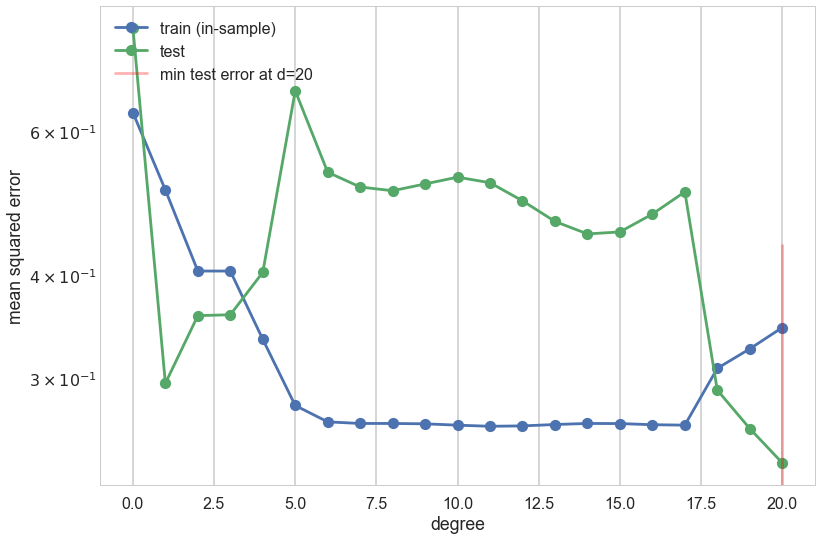

In [177]:
for d in degrees:#for increasing polynomial degrees 0,1,2...
    Xtrain = traintestlists[d]['train']
    Xtest = traintestlists[d]['test']
    #set up model
    est = LinearRegression()
    #fit
    est.fit(Xtrain, ytrain)
    #predict
    prediction_on_training = est.predict(Xtrain)
    prediction_on_test = est.predict(Xtest)
    #calculate mean squared error
    error_train[d] = mean_squared_error(ytrain, prediction_on_training)
    error_test[d] = mean_squared_error(ytest, prediction_on_test)

plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_test, marker='o', label='test')
plt.axvline(np.argmin(error_test), 0,0.5, color='r', label="min test error at d=%d"%np.argmin(error_test), alpha=0.3)
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")

16


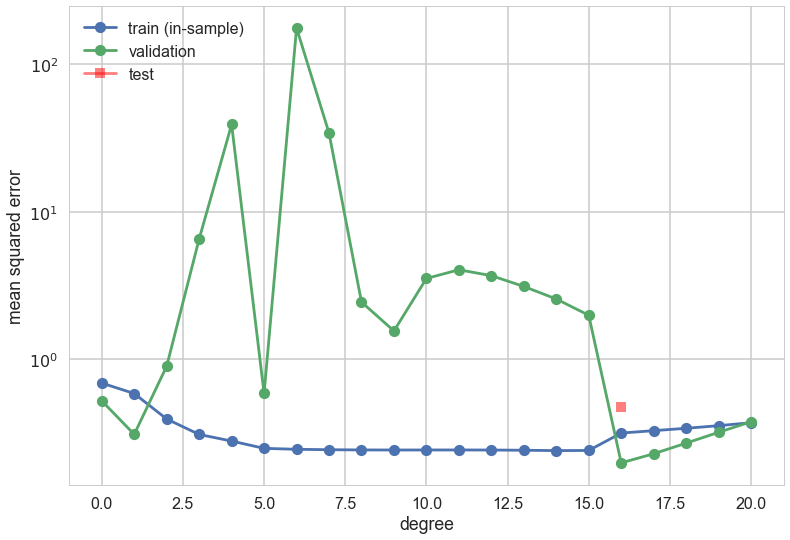

In [179]:
#we split the training set down further
intrain,invalid = train_test_split(itrain,train_size=18, test_size=6)
xntrain= df.x[intrain].values
fntrain = df.f[intrain].values
yntrain = df.y[intrain].values
xnvalid= df.x[invalid].values
fnvalid = df.f[invalid].values
ynvalid = df.y[invalid].values

degrees=range(21)
error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
trainvalidlists=make_features(xntrain, xnvalid, degrees)

for d in degrees:#for increasing polynomial degrees 0,1,2...
    #Create polynomials from x
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    #fit a model linear in polynomial coefficients on the new smaller training set
    est = LinearRegression()
    est.fit(Xntrain, yntrain)
    #predict on new training and validation sets and calculate mean squared error
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))

#calculate the degree at which validation error is minimized
mindeg = np.argmin(error_valid) 
ttlist=make_features(xtrain, xtest, degrees)
#fit on whole training set now.
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain) # fit
#predict on the test set now and calculate error
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(ytest, pred)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test', alpha=0.5, color='r')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")
print (mindeg)

5


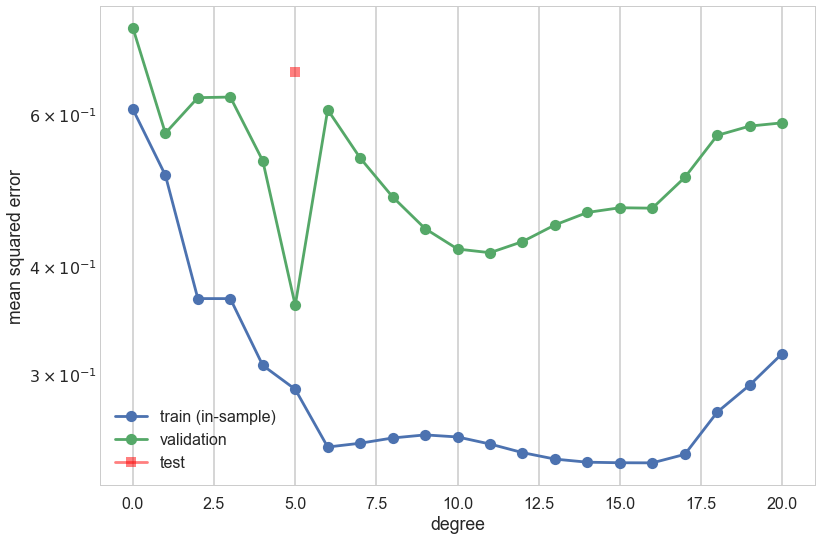

In [181]:
intrain,invalid = train_test_split(itrain,train_size=18, test_size=6)
xntrain= df.x[intrain].values
fntrain = df.f[intrain].values
yntrain = df.y[intrain].values
xnvalid= df.x[invalid].values
fnvalid = df.f[invalid].values
ynvalid = df.y[invalid].values

degrees=range(21)
error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
trainvalidlists=make_features(xntrain, xnvalid, degrees)

for d in degrees:#for increasing polynomial degrees 0,1,2...
    #Create polynomials from x
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    #fit a model linear in polynomial coefficients on the training set
    est = LinearRegression()
    est.fit(Xntrain, yntrain)
    #calculate mean squared error
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))

mindeg = np.argmin(error_valid)
ttlist=make_features(xtrain, xtest, degrees)
#fit on whole training set now.
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain) # fit
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(ytest, pred)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test', alpha=0.5, color='r')

plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='lower left')
plt.yscale("log")
print (mindeg)

In [182]:
from sklearn.cross_validation import KFold
n_folds=4
degrees=range(21)
results=[]
for d in degrees:
    hypothesisresults=[]
    for train, test in KFold(24, n_folds): # split data into train/test groups, 4 times
        tvlist=make_features(xtrain[train], xtrain[test], degrees)
        clf = LinearRegression()
        clf.fit(tvlist[d]['train'], ytrain[train]) # fit
        hypothesisresults.append(mean_squared_error(ytrain[test], clf.predict(tvlist[d]['test']))) # evaluate score function on held-out data
    results.append((np.mean(hypothesisresults), np.min(hypothesisresults), np.max(hypothesisresults))) # average

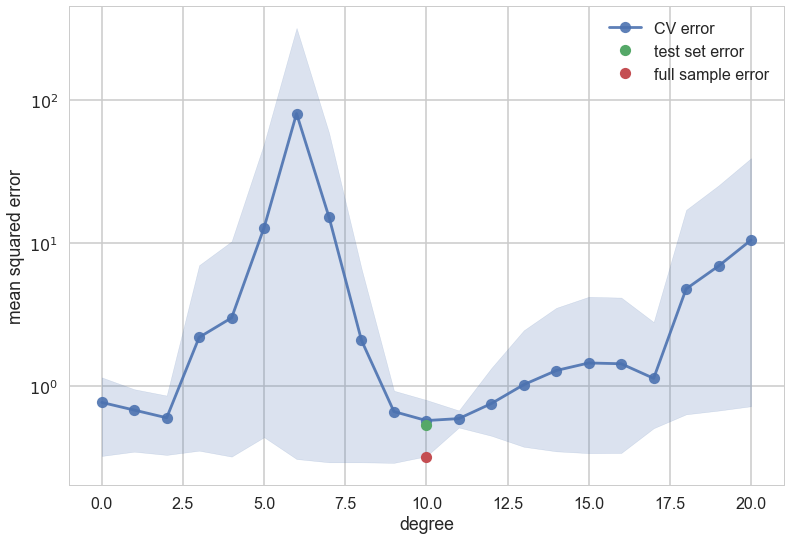

In [183]:
mindeg = np.argmin([r[0] for r in results])
ttlist=make_features(xtrain, xtest, degrees)
#fit on whole training set now.
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain) # fit
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(pred, ytest)
errtr=mean_squared_error(ytrain, clf.predict(ttlist[mindeg]['train']))
errout=0.8*errtr+0.2*err
c0=sns.color_palette()[0]
#plt.errorbar(degrees, [r[0] for r in results], yerr=[r[1] for r in results], marker='o', label='CV error', alpha=0.5)
plt.plot(degrees, [r[0] for r in results], marker='o', label='CV error', alpha=0.9)
plt.fill_between(degrees, [r[1] for r in results], [r[2] for r in results], color=c0, alpha=0.2)
plt.plot([mindeg], [err], 'o',  label='test set error')
plt.plot([mindeg], [errout], 'o',  label='full sample error')


plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper right')
plt.yscale("log")

(100, 3)


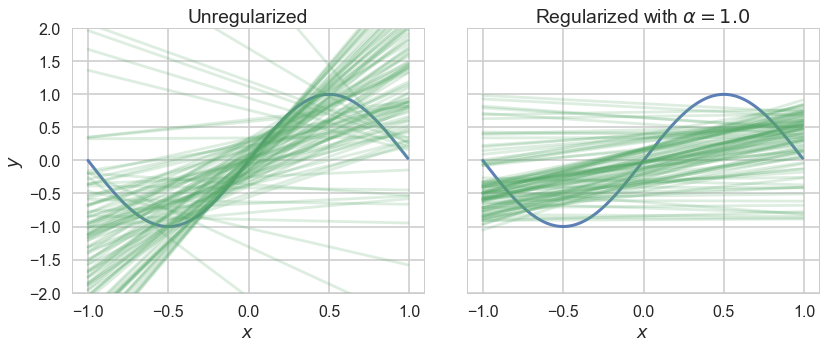

In [185]:
xs=np.arange(-1.,1.,0.01)
ff = lambda x: np.sin(np.pi*x)
ffxs=ff(xs)
from sklearn.linear_model import Ridge
axes=make_simple_plot()
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
axes[0].plot(xs, ff(xs), alpha=0.9, lw=3, color=c0)
axes[1].plot(xs, ff(xs), alpha=0.9, lw=3, color=c0)
from sklearn.linear_model import Ridge
D=np.empty((100,3), dtype="int")
print (D.shape)
for i in range(100):
    D[i,:] = np.random.choice(200, replace=False, size=3)
for i in range(100):
    choices = D[i,:]
    p1=np.polyfit(xs[choices], ffxs[choices],1)
    est = Ridge(alpha=1.0)
    est.fit(xs[choices].reshape(-1,1), ffxs[choices])
    axes[0].plot(xs, np.polyval(p1, xs), color=c1, alpha=0.2)
    axes[1].plot(xs, est.predict(xs.reshape(-1,1)), color=c1, alpha=0.2)
axes[0].set_title("Unregularized");
axes[1].set_title("Regularized with $\\alpha=1.0$");

In [210]:
def plot_functions(est, ax, df, alpha, xtest, Xtest, xtrain, ytrain):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(df.x, df.f, color='k', label='f')
    ax.plot(xtrain, ytrain, 's', label="training", alpha=0.4)
    ax.plot(xtest, ytest, 's', label="testing", alpha=0.6)
    transx=np.arange(0,1.1,0.01)
    transX = PolynomialFeatures(20).fit_transform(transx.reshape(-1,1))
    ax.plot(transx, est.predict(transX),  '.', label="alpha = %s" % str(alpha))
    ax.set_ylim((0, 7))
    ax.set_xlim((0, 110))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right')
    
def plot_coefficients(est, ax, alpha):
    coef = est.coef_.ravel()
    ax.semilogy(np.abs(coef), marker='o', label="alpha = %s" % str(alpha))
    ax.set_ylim((1e-20, 1e-5))
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.legend(loc='upper left')

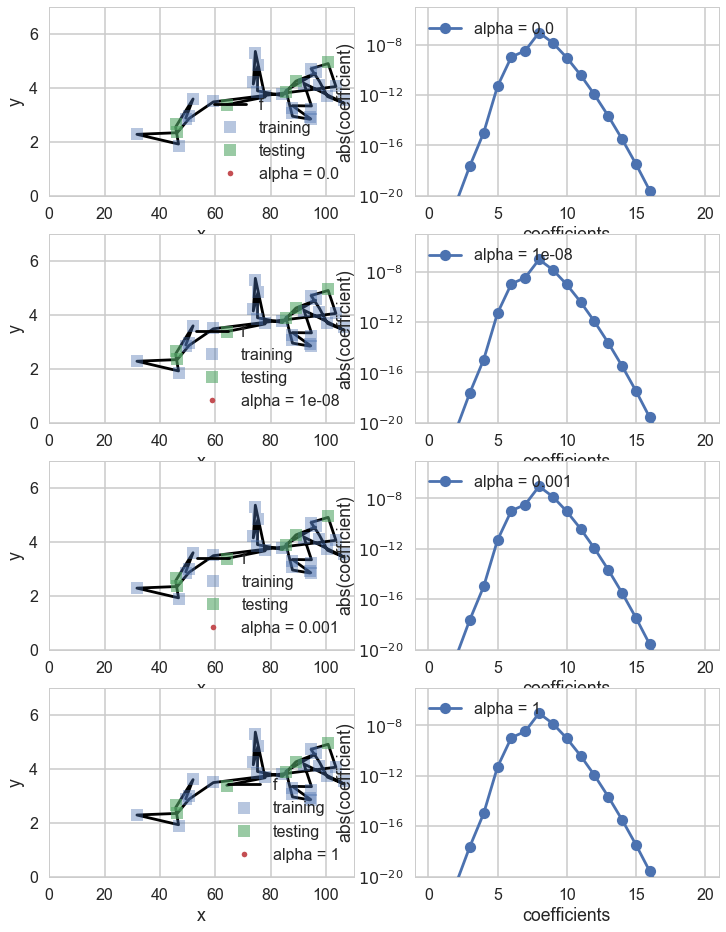

In [211]:
fig, rows = plt.subplots(4, 2, figsize=(12, 16))
d=20
alphas = [0.0, 1e-8, 1e-3, 1]
Xtrain = traintestlists[d]['train']
Xtest = traintestlists[d]['test']
for i, alpha in enumerate(alphas):
    l,r=rows[i]
    est = Ridge(alpha=alpha)
    est.fit(Xtrain, ytrain)
    plot_functions(est, l, df, alpha, xtest, Xtest, xtrain, ytrain )
    plot_coefficients(est, r, alpha)

In [212]:
from sklearn.metrics import make_scorer
#, 1e-6, 1e-5, 1e-3, 1.0
from sklearn.grid_search import GridSearchCV
def cv_optimize_ridge(X, y, n_folds=4):
    clf = Ridge()
    parameters = {"alpha": [1e-8, 1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0]}
    #the scoring parameter below is the default one in ridge, but you can use a different one
    #in the cross-validation phase if you want.
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring="mean_squared_error")
    gs.fit(X, y)
    return gs

In [213]:
fitmodel = cv_optimize_ridge(Xtrain, ytrain, n_folds=4)

C:\Users\Angus\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\Angus\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Angus\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\Angus\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Angus\Anaconda3\lib\site-packages\skl

In [214]:
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(Ridge(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001),
 {'alpha': 1e-08},
 -1.2584289262813069,
 [mean: -1.25843, std: 0.31150, params: {'alpha': 1e-08},
  mean: -1.25843, std: 0.31150, params: {'alpha': 1e-06},
  mean: -1.25843, std: 0.31150, params: {'alpha': 1e-05},
  mean: -1.25843, std: 0.31150, params: {'alpha': 5e-05},
  mean: -1.25843, std: 0.31150, params: {'alpha': 0.0001},
  mean: -1.25843, std: 0.31150, params: {'alpha': 0.0005},
  mean: -1.25843, std: 0.31150, params: {'alpha': 0.001},
  mean: -1.25843, std: 0.31150, params: {'alpha': 0.01},
  mean: -1.25843, std: 0.31150, params: {'alpha': 0.1},
  mean: -1.25843, std: 0.31150, params: {'alpha': 1.0}])

In [215]:
alphawechoose = fitmodel.best_params_['alpha']
clf = Ridge(alpha=alphawechoose).fit(Xtrain,ytrain)

In [216]:
err=mean_squared_error(clf.predict(Xtest), ytest)
errtr=mean_squared_error(clf.predict(Xtrain), ytrain)
errout=0.8*errtr+0.2*err

In [217]:
def plot_functions_onall(est, ax, df, alpha, xtrain, ytrain, Xtrain, xtest, ytest):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(df.x, df.f, color='k', label='f')
    ax.plot(xtrain, ytrain, 's', alpha=0.4, label="train")
    ax.plot(xtest, ytest, 's', alpha=0.6, label="test")
    transx=np.arange(0,1.1,0.01)
    transX = PolynomialFeatures(20).fit_transform(transx.reshape(-1,1))
    ax.plot(transx, est.predict(transX), '.', alpha=0.6, label="alpha = %s" % str(alpha))
    #print est.predict(transX)
    ax.set_ylim((0, 7))
    ax.set_xlim((0, 110))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right')

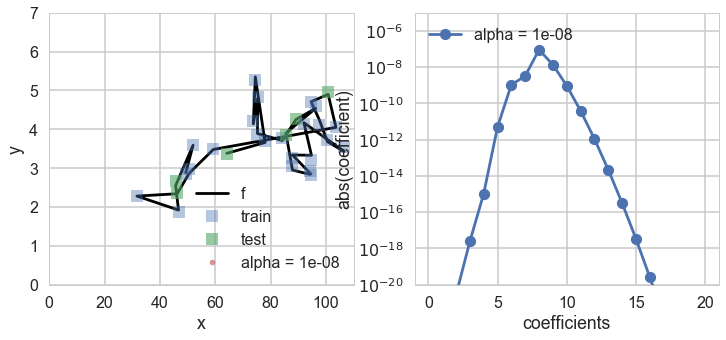

In [218]:
fig, rows = plt.subplots(1, 2, figsize=(12, 5))
l,r=rows
plot_functions_onall(clf, l, df, alphawechoose, xtrain, ytrain, Xtrain, xtest, ytest)
plot_coefficients(clf, r, alphawechoose)